# TO EXPLORE SUPERVISED MACHINE LEARNING
### SOURABH KHIWANSRA

#### This is a regression task in which the  percentage of marks that a student is expected to score based upon number of hourse studied. As it involves just two varibles this is a simple linear regression problem.
####  Dataset used: http://bit.ly/w-data

### Importing essential libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing and reading the data.

In [3]:
path='http://bit.ly/w-data'
df=pd.read_csv(path)
print('Data has been imported succcesfully.')

Data has been imported succcesfully.


### Getting overview of the dataframe and basic information.

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
print(df.shape) # To get the size of the dataframe

(25, 2)


In [6]:
#Returns the basic information of the data such as datatypes and total number of entries.
df_info=df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [7]:
# Since we know that there are no null values and a proper datatype for each column. Also data is numerical type we can apply 
#describe method to generate statistical summary of the dataset.
df_summary=df.describe()
df_summary

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Let's visualize the data.

Text(0.5, 0, 'Hours studied')

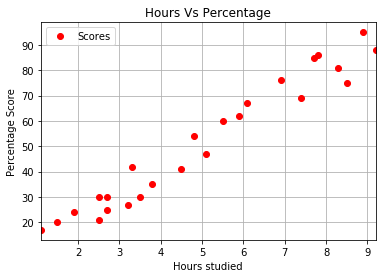

In [54]:
# We need to find the distribution plot of the scores.
df.plot('Hours','Scores',style='ro')
plt.grid()
plt.title('Hours Vs Percentage')
plt.ylabel('Percentage Score')
plt.xlabel('Hours studied')

### Preparing  the Data
#### We have to divide data into input and ouput.

In [9]:
x=df.iloc[:,:1].values # Used to create the attribute.
y=df.iloc[:,1].values  # To create Label.

In [10]:
# Splitting the data into training and testing the data.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
# Algorithm is generated. Now aim is to train the model.

### Training the Algorithm
#### We have our training and testing sets. Now its time for training the model.

In [11]:
from sklearn.linear_model import LinearRegression
r=LinearRegression()
r.fit(x_train,y_train)
print('Training Completed')

Training Completed


In [12]:
# Generating the coeffincents of the regrssion line.
m=r.coef_
c=r.intercept_
print('The Line is: y=',m,'x','+',c)

The Line is: y= [9.91065648] x + 2.018160041434683


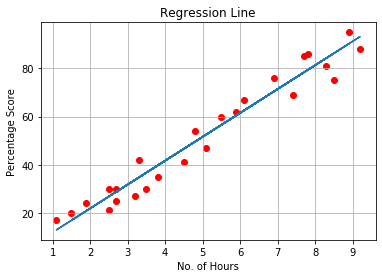

In [13]:
# To plot the regression Line.
y_line=m*x+c
plt.scatter(x,y,color='r')
plt.grid()
plt.plot(x,y_line)
plt.title('Regression Line')
plt.xlabel('No. of Hours')
plt.ylabel('Percentage Score')
plt.show()

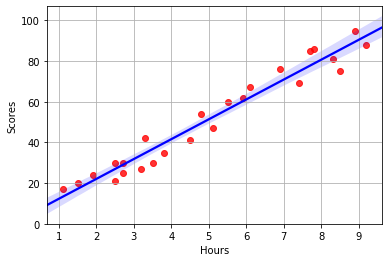

In [41]:
# To plot regression line using seaborn library.
import seaborn as sns
sns.regplot('Hours','Scores',data=df,color='red',line_kws={'color':'blue'})
plt.grid()

### Testing the Data.

In [14]:
y_predicted=r.predict(x_test)

In [60]:
test_df=pd.DataFrame(np.c_[x_test,y_test,y_predicted],columns=['Hours Studied','Actual Marks','Predicted Marks'])
test_df

,Hours Studied,Actual Marks,Predicted Marks
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


### To predict the marks when student studies 9.25 Hours.

In [16]:
hours=9.25
own_pred=r.predict([[hours]])

In [20]:
print('No.of hours studies:',hours)
print('Percentage obtained:',own_pred[0],'%')

No.of hours studies: 9.25
Percentage obtained: 93.69173248737538 %


### Model Evaluation

In [23]:
from sklearn import metrics

In [24]:
# Training score:
print(r.score(x_train,y_train))

0.9515510725211553


In [26]:
# Testing Score:
print(r.score(x_test,y_test))

0.9454906892105356


In [29]:
# To get the mean Absolute error
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predicted))

Mean Absolute Error: 4.183859899002975


#### Results: If the person studies for 9.25 hours he may get 93.697%
#### MAE: 4.183859899002975
#### Test Accuracy: 94.549%